In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import linearmodels as lm
import matplotlib
import math
import statsmodels.formula.api as smf

from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects
from linearmodels.panel import FirstDifferenceOLS
from linearmodels.panel import compare
from matplotlib import pyplot as plt

from pandas.api.types import is_numeric_dtype

pd.set_option('display.max_columns', 500)

%matplotlib inline

In [2]:
df=pd.read_csv('../Factors and Ridership Data/Final Datasets/final_dataset.csv',
                    encoding='utf-8')
df.head()

,Unnamed: 0,Id2,Geography_x,Total_HH,HH_0Veh,HH_1Veh,HH_2Veh,HH_3Veh,HH_4+Veh,Year,CBSA Code,Pop_TSD,Tot_Emp_TSD,Tot_Retail_TSD,gasPrice,JTW_DA,JTW_CARPOOL,JTW_TRANSIT,MEAN_TT,HH_MED_INC,HH_MEAN_INC,INC_U35,INC_35_100,INC_100P,Tot_Pop,Tot_Instate_Pop,Tot_Outstate_Pop,Tot_NonUSA_POP,Total_Median_Income_Individual,Native_Instate_Med_Inc_Indiv,Native_Outstate_Med_Inc_Indiv,Native_Outcountry_Med_Inc_Indiv,Total_Pop_Poverty,Pop_Below100_Poverty,Pop_Below150_Poverty,Pop_Above150_Poverty,Age_under18,Age_18to64,Age_over64,MNAME,RailBus,Cluster_upt,upt,VRM,Geog_Blank,Total_Labor_MSA,Unemployment_Labor_MSA,Employment_Labor:MSA,Unemployment_Rate_MSA,Geography_y,Geography_Blank
0,0,10420,"Akron, OH Metro Area",276416,20661,85198,112380,40847,17330,2005,10420.0,100521.5,41364.0,4110.0,2.246667,286375,22594,2492,22.4,44719,58676,38.7,46.8,14.5,684459.0,521491.0,138184.0,2945.0,24612,24899,24755,16933,683742.0,11.3,8.1,80.7,23.7,63.2,13.1,"Akron, OH Metro Area",Bus,1.0,1.294596e+06,572693.645833,"Akron,OHMetroArea",NaN,NaN,NaN,NaN,NaN,NaN
1,1,10420,"Akron, OH Metro Area",276416,20661,85198,112380,40847,17330,2005,10420.0,100521.5,41364.0,4110.0,2.246667,286375,22594,2492,22.4,44719,58676,38.7,46.8,14.5,684459.0,521491.0,138184.0,2945.0,24612,24899,24755,16933,683742.0,11.3,8.1,80.7,23.7,63.2,13.1,"Akron, OH Metro Area",DemandResponse,1.0,2.750892e+04,180695.895833,"Akron,OHMetroArea",NaN,NaN,NaN,NaN,NaN,NaN
2,2,10420,"Akron, OH Metro Area",276416,20661,85198,112380,40847,17330,2005,10420.0,100521.5,41364.0,4110.0,2.246667,286375,22594,2492,22.4,44719,58676,38.7,46.8,14.5,684459.0,521491.0,138184.0,2945.0,24612,24899,24755,16933,683742.0,11.3,8.1,80.7,23.7,63.2,13.1,"Akron, OH Metro Area",Rail,1.0,8.678297e+05,211674.333333,"Akron,OHMetroArea",NaN,NaN,NaN,NaN,NaN,NaN
3,3,10420,"Akron, OH Metro Area",280837,19248,97567,109326,38795,15901,2006,10420.0,99593.0,43378.0,3771.0,2.544250,291970,24769,4492,22.2,44507,58859,38.8,47.2,14.0,700943.0,530777.0,139714.0,4695.0,23925,24129,23644,19423,684898.0,12.7,7.8,79.5,23.3,63.3,13.4,"Akron, OH Metro Area",Bus,1.0,1.363776e+06,536282.729167,"Akron,OHMetroArea",NaN,NaN,NaN,NaN,NaN,NaN
4,4,10420,"Akron, OH Metro Area",280837,19248,97567,109326,38795,15901,2006,10420.0,99593.0,43378.0,3771.0,2.544250,291970,24769,4492,22.2,44507,58859,38.8,47.2,14.0,700943.0,530777.0,139714.0,4695.0,23925,24129,23644,19423,684898.0,12.7,7.8,79.5,23.3,63.3,13.4,"Akron, OH Metro Area",DemandResponse,1.0,2.596081e+04,177142.875000,"Akron,OHMetroArea",NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
list(df)

['Unnamed: 0',
 'Id2',
 'Geography_x',
 'Total_HH',
 'HH_0Veh',
 'HH_1Veh',
 'HH_2Veh',
 'HH_3Veh',
 'HH_4+Veh',
 'Year',
 'CBSA Code',
 'Pop_TSD',
 'Tot_Emp_TSD',
 'Tot_Retail_TSD',
 'gasPrice',
 'JTW_DA',
 'JTW_CARPOOL',
 'JTW_TRANSIT',
 'MEAN_TT',
 'HH_MED_INC',
 'HH_MEAN_INC',
 'INC_U35',
 'INC_35_100',
 'INC_100P',
 'Tot_Pop',
 'Tot_Instate_Pop',
 'Tot_Outstate_Pop',
 'Tot_NonUSA_POP',
 'Total_Median_Income_Individual',
 'Native_Instate_Med_Inc_Indiv',
 'Native_Outstate_Med_Inc_Indiv',
 'Native_Outcountry_Med_Inc_Indiv',
 'Total_Pop_Poverty',
 'Pop_Below100_Poverty',
 'Pop_Below150_Poverty',
 'Pop_Above150_Poverty',
 'Age_under18',
 'Age_18to64',
 'Age_over64',
 'MNAME',
 'RailBus',
 'Cluster_upt',
 'upt',
 'VRM',
 'Geog_Blank',
 'Total_Labor_MSA',
 'Unemployment_Labor_MSA',
 'Employment_Labor:MSA',
 'Unemployment_Rate_MSA',
 'Geography_y',
 'Geography_Blank']

In [3]:
df=df.drop(columns=['Unnamed: 0','Geography_y','Geography_Blank'])

In [4]:
df.head()

,Id2,Geography_x,Total_HH,HH_0Veh,HH_1Veh,HH_2Veh,HH_3Veh,HH_4+Veh,Year,CBSA Code,Pop_TSD,Tot_Emp_TSD,Tot_Retail_TSD,gasPrice,JTW_DA,JTW_CARPOOL,JTW_TRANSIT,MEAN_TT,HH_MED_INC,HH_MEAN_INC,INC_U35,INC_35_100,INC_100P,Tot_Pop,Tot_Instate_Pop,Tot_Outstate_Pop,Tot_NonUSA_POP,Total_Median_Income_Individual,Native_Instate_Med_Inc_Indiv,Native_Outstate_Med_Inc_Indiv,Native_Outcountry_Med_Inc_Indiv,Total_Pop_Poverty,Pop_Below100_Poverty,Pop_Below150_Poverty,Pop_Above150_Poverty,Age_under18,Age_18to64,Age_over64,MNAME,RailBus,Cluster_upt,upt,VRM,Geog_Blank,Total_Labor_MSA,Unemployment_Labor_MSA,Employment_Labor:MSA,Unemployment_Rate_MSA
0,10420,"Akron, OH Metro Area",276416,20661,85198,112380,40847,17330,2005,10420.0,100521.5,41364.0,4110.0,2.246667,286375,22594,2492,22.4,44719,58676,38.7,46.8,14.5,684459.0,521491.0,138184.0,2945.0,24612,24899,24755,16933,683742.0,11.3,8.1,80.7,23.7,63.2,13.1,"Akron, OH Metro Area",Bus,1.0,1.294596e+06,572693.645833,"Akron,OHMetroArea",NaN,NaN,NaN,NaN
1,10420,"Akron, OH Metro Area",276416,20661,85198,112380,40847,17330,2005,10420.0,100521.5,41364.0,4110.0,2.246667,286375,22594,2492,22.4,44719,58676,38.7,46.8,14.5,684459.0,521491.0,138184.0,2945.0,24612,24899,24755,16933,683742.0,11.3,8.1,80.7,23.7,63.2,13.1,"Akron, OH Metro Area",DemandResponse,1.0,2.750892e+04,180695.895833,"Akron,OHMetroArea",NaN,NaN,NaN,NaN
2,10420,"Akron, OH Metro Area",276416,20661,85198,112380,40847,17330,2005,10420.0,100521.5,41364.0,4110.0,2.246667,286375,22594,2492,22.4,44719,58676,38.7,46.8,14.5,684459.0,521491.0,138184.0,2945.0,24612,24899,24755,16933,683742.0,11.3,8.1,80.7,23.7,63.2,13.1,"Akron, OH Metro Area",Rail,1.0,8.678297e+05,211674.333333,"Akron,OHMetroArea",NaN,NaN,NaN,NaN
3,10420,"Akron, OH Metro Area",280837,19248,97567,109326,38795,15901,2006,10420.0,99593.0,43378.0,3771.0,2.544250,291970,24769,4492,22.2,44507,58859,38.8,47.2,14.0,700943.0,530777.0,139714.0,4695.0,23925,24129,23644,19423,684898.0,12.7,7.8,79.5,23.3,63.3,13.4,"Akron, OH Metro Area",Bus,1.0,1.363776e+06,536282.729167,"Akron,OHMetroArea",NaN,NaN,NaN,NaN
4,10420,"Akron, OH Metro Area",280837,19248,97567,109326,38795,15901,2006,10420.0,99593.0,43378.0,3771.0,2.544250,291970,24769,4492,22.2,44507,58859,38.8,47.2,14.0,700943.0,530777.0,139714.0,4695.0,23925,24129,23644,19423,684898.0,12.7,7.8,79.5,23.3,63.3,13.4,"Akron, OH Metro Area",DemandResponse,1.0,2.596081e+04,177142.875000,"Akron,OHMetroArea",NaN,NaN,NaN,NaN


In [5]:
df.MNAME.describe()

count                            5039
unique                            170
top       Jacksonville, FL Metro Area
freq                               52
Name: MNAME, dtype: object

In [6]:
df.sort_values(by=['MNAME','RailBus','Year'])

,Id2,Geography_x,Total_HH,HH_0Veh,HH_1Veh,HH_2Veh,HH_3Veh,HH_4+Veh,Year,CBSA Code,Pop_TSD,Tot_Emp_TSD,Tot_Retail_TSD,gasPrice,JTW_DA,JTW_CARPOOL,JTW_TRANSIT,MEAN_TT,HH_MED_INC,HH_MEAN_INC,INC_U35,INC_35_100,INC_100P,Tot_Pop,Tot_Instate_Pop,Tot_Outstate_Pop,Tot_NonUSA_POP,Total_Median_Income_Individual,Native_Instate_Med_Inc_Indiv,Native_Outstate_Med_Inc_Indiv,Native_Outcountry_Med_Inc_Indiv,Total_Pop_Poverty,Pop_Below100_Poverty,Pop_Below150_Poverty,Pop_Above150_Poverty,Age_under18,Age_18to64,Age_over64,MNAME,RailBus,Cluster_upt,upt,VRM,Geog_Blank,Total_Labor_MSA,Unemployment_Labor_MSA,Employment_Labor:MSA,Unemployment_Rate_MSA
0,10420,"Akron, OH Metro Area",276416,20661,85198,112380,40847,17330,2005,10420.0,100521.5,41364.0,4110.0,2.246667,286375,22594,2492,22.4,44719,58676,38.7,46.8,14.5,684459.0,521491.0,138184.0,2945.0,24612,24899,24755,16933,683742.0,11.3,8.1,80.7,23.7,63.2,13.1,"Akron, OH Metro Area",Bus,1.0,1.294596e+06,572693.645833,"Akron,OHMetroArea",NaN,NaN,NaN,NaN
3,10420,"Akron, OH Metro Area",280837,19248,97567,109326,38795,15901,2006,10420.0,99593.0,43378.0,3771.0,2.544250,291970,24769,4492,22.2,44507,58859,38.8,47.2,14.0,700943.0,530777.0,139714.0,4695.0,23925,24129,23644,19423,684898.0,12.7,7.8,79.5,23.3,63.3,13.4,"Akron, OH Metro Area",Bus,1.0,1.363776e+06,536282.729167,"Akron,OHMetroArea",NaN,NaN,NaN,NaN
6,10420,"Akron, OH Metro Area",281669,21066,94071,113232,36917,16383,2007,10420.0,98664.5,41173.0,3626.0,2.821583,287237,23483,4350,23.1,47898,63454,37.2,46.1,16.7,699356.0,536148.0,135625.0,3455.0,25217,25202,24776,25575,682807.0,13.4,7.6,79.0,23.3,63.4,13.3,"Akron, OH Metro Area",Bus,1.0,1.237511e+06,619889.937500,"Akron,OHMetroArea",NaN,NaN,NaN,NaN
9,10420,"Akron, OH Metro Area",281731,19035,100229,108332,38548,15587,2008,10420.0,97736.0,41542.0,3830.0,3.229500,292377,25902,5436,22.9,50036,65801,36.4,45.1,18.5,698553.0,529519.0,137011.0,4452.0,25357,25559,25281,15247,681880.0,12.1,8.2,79.7,22.9,63.5,13.6,"Akron, OH Metro Area",Bus,1.0,1.246294e+06,565919.229167,"Akron,OHMetroArea",NaN,NaN,NaN,NaN
12,10420,"Akron, OH Metro Area",281769,23447,97811,108215,36339,15957,2009,10420.0,96807.5,40430.0,3743.0,2.332250,282744,19361,4581,23.2,47482,60668,36.8,48.1,15.1,699935.0,537803.0,134499.0,2466.0,24856,24810,24817,29301,685405.0,14.7,7.2,78.1,22.4,63.6,14.0,"Akron, OH Metro Area",Bus,1.0,1.000726e+06,522729.145833,"Akron,OHMetroArea",NaN,NaN,NaN,NaN
15,10420,"Akron, OH Metro Area",281523,22621,92537,114311,35021,17033,2010,10420.0,95879.0,42831.0,3601.0,2.778083,280287,18056,4649,22.6,46521,60782,38.0,45.6,16.4,702951.0,539313.0,132784.0,3944.0,24592,24348,25441,18974,687098.0,NaN,NaN,NaN,22.3,63.4,14.3,"Akron, OH Metro Area",Bus,1.0,9.651169e+05,441539.687500,"Akron,OHMetroArea",NaN,NaN,NaN,NaN
18,10420,"Akron, OH Metro Area",274696,22332,98938,101762,35249,16415,2011,10420.0,94950.5,42304.0,3743.0,3.531833,276444,23293,4336,23.3,47032,62438,38.4,45.1,16.5,701456.0,541743.0,127206.0,5605.0,24744,24630,24718,19914,684916.0,NaN,NaN,NaN,21.9,63.7,14.4,"Akron, OH Metro Area",Bus,1.0,9.980988e+05,441347.395833,"Akron,OHMetroArea",NaN,NaN,NaN,NaN
21,10420,"Akron, OH Metro Area",280887,24001,98798,110693,32826,14569,2012,10420.0,94022.0,38523.0,3513.0,3.613333,280282,23756,4285,23.1,49731,65187,35.5,46.2,18.3,702262.0,541057.0,125650.0,5192.0,25564,25656,25880,25575,687031.0,NaN,NaN,NaN,21.6,63.5,14.9,"Akron, OH Metro Area",Bus,1.0,1.034553e+06,444956.000000,"Akron,OHMetroArea",NaN,NaN,NaN,NaN
24,10420,"Akron, OH Metro Area",281324,22696,97785,108261,37798,14784,2013,10420.0,93093.5,38283.0,3405.0,3.518417,286548,21490,5807,23.1,49984,67507,35.2,45.7,19.1,705686.0,541286.0,125313.0,4056.0,25830,25899,25802,28875,690331.0,15.4,8.5,76.0,21.3,63.5,15.2,"Akron, OH Metro Area",Bus,1.0,1.051065e+06,470401.916667,"Akron,OHMetroArea",NaN,NaN,NaN,NaN
27,10420,"Akron, OH Metro Area",283364,23065,96377,110920,37946,15056,2014,10420.0,92165.0,38733.0,3343.0,3.364500,292974,23208,5845,22.9,50538,67821,35.1,44.9,20.0,703825.0,537

Text(0.5, 203.57714285714286, '')

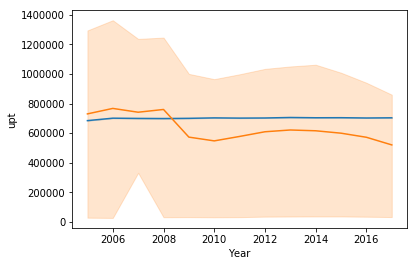

In [13]:
#fig, axes = plt.subplots(nrows=6)
    
ax1 = sns.lineplot(x='Year',y='Tot_Pop',markers=True, data=df[df['MNAME']=='Akron, OH Metro Area'])
axes[0].set_ylabel('Metro Population')
axes[0].set_xlabel('')
#ax1.set_xlim('2002-01-01','2018-04-01')

ax2 = sns.lineplot(x='Year',y='upt',markers=True, data=df[df['MNAME']=='Akron, OH Metro Area'])
axes[0].set_ylabel('upt')
axes[0].set_xlabel('')